<a href="https://colab.research.google.com/github/dhuMuhammadasif/test/blob/master/17_3_2023_Rate_dependent_hysteresis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split

In [229]:
df_1 =pd.read_excel('/content/20khz.xlsx')
train_x = np.array(df_1['x'], dtype=np.float64)
train_y = np.array(df_1['y'], dtype=np.float64)

# train_x = np.array(df['x'], dtype=np.float64)
# train_y = np.array(df['y'], dtype=np.float64)
print(train_x.shape, train_y.shape)

(2001,) (2001,)


In [232]:
train_x_del.shape

(2001,)

In [233]:
train_y.shape

(2001,)

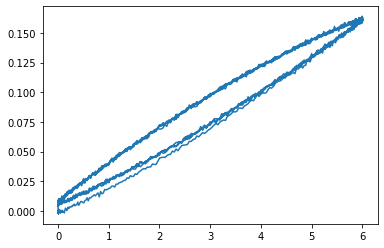

In [235]:
plt.plot(train_x,train_y)
plt.show()

In [236]:
def ewma_vectorized(data, window):
    alpha = 3 /(window + 3)
    alpha_rev = 1 - alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+2)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

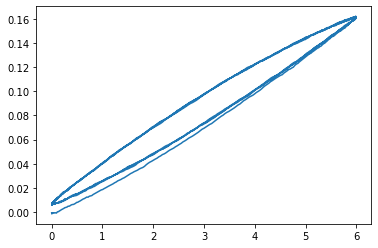

In [237]:
train_y_f = ewma_vectorized(train_y, 12)
train_x_f = ewma_vectorized(train_x, 12)

plt.plot(train_x_f, train_y_f)
plt.show()

In [238]:
train_x_del = np.gradient(train_x) #that is used in making condition for function

In [244]:
train_x_inc = train_x[train_x_del > 0]  #train_x data used for inc f(xp)function finding
train_x_dec = train_x[train_x_del < 0] # train_x data used for dec f(xp)function finding

In [245]:
print(train_x_inc.shape,train_x_dec.shape)

(997,) (997,)


In [246]:
train_x=train_x_inc+train_x_dec

In [247]:
train_x.shape

(997,)

In [248]:
train_x_inc=train_x_inc[:900]   #trimming of data set to avoid dimenssional error
train_x_dec=train_x_dec[:900]


In [249]:
print(train_x_inc.shape,train_x_dec.shape)

(900,) (900,)


In [250]:
train_y=train_y[:900]

In [251]:
train_y.shape

(900,)

In [ ]:
#train_x_inc = train_x[train_x_del >= 0]
#train_y_inc = train_y[x_diff >= 0]
#plt.subplot(2, 1, 1)
plt.plot(train_x_inc, train_y_f)
plt.show()
#plt.plot(train_x_inc)
# train_x_inc=train_x_inc[4:]
#plt.plot(train_x_inc,train_y)
                                                     # from where i want to combine inc and dec condition
#train_x_dec = train_x[train_x_del < 0]
#train_y_dec = train_y[x_diff < 0]
#plt.subplot(2, 1, 2)
# plt.plot(train_x_inc, train_y_inc,',')
#plt.plot(train_x_dec, train_y)
#plt.plot(train_x_dec)
#plt.show()

In [129]:
print(train_x_inc.shape, train_y.shape)

(1000,) (2001,)


In [25]:
n_train = 1750
train_x = train_x[:n_train]
train_y=train_y[:n_train]

In [256]:
train_x=train_x[:900]


In [257]:
print(train_x.shape, train_y.shape)

(900,) (900,)


In [258]:
minimas = signal.argrelmin(train_x)[0]
maximas = signal.argrelmax(train_x)[0]

minimas_values = train_x[minimas]
maximas_values = train_x[maximas]

minimas_values, maximas_values

(array([], dtype=float64), array([11.99952, 11.99952, 11.99952]))

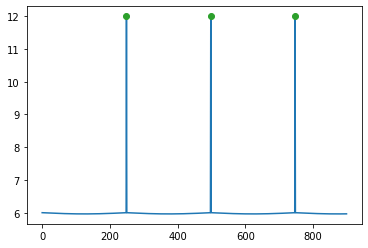

In [259]:
plt.plot(train_x)
plt.plot(minimas, minimas_values, 'o')
plt.plot(maximas, maximas_values, 'o')
plt.show()

In [260]:
print(maximas.shape,maximas_values.shape,minimas.shape,minimas_values.shape)

(3,) (3,) (0,) (0,)


In [334]:
df_1 =pd.read_excel('/content/20khz.xlsx')
train_x = np.array(df_1['x'], dtype=np.float64)
train_y = np.array(df_1['y'], dtype=np.float64)

# train_x = np.array(df['x'], dtype=np.float64)
# train_y = np.array(df['y'], dtype=np.float64)
print(train_x.shape, train_y.shape)

(2001,) (2001,)


In [50]:
n_train = 2000
train_x = train_x[:n_train]
train_y=train_y[:n_train]

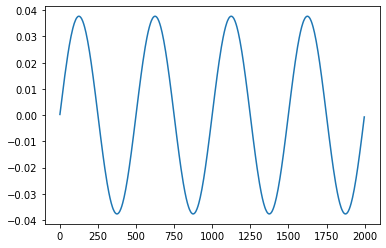

In [56]:
x_diff = np.diff(train_x)
plt.plot(x_diff)
plt.show()

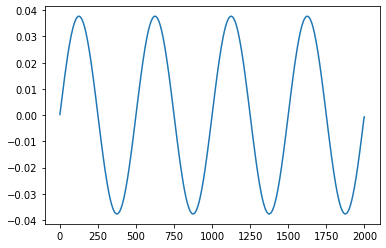

In [61]:
x_diff = np.diff(train_x)
x_diff = np.append(x_diff, x_diff[-1])
plt.plot(x_diff)
plt.show()

In [ ]:
plt.plot(train_x)

In [333]:
train_x_inc = train_x[x_diff >= 0]
train_y_inc = train_y[x_diff >= 0]
# plt.subplot(2, 1, 1)
# plt.scatter(train_x_inc, train_y_inc)
# plt.show()
                                                    # from where i want to combine inc and dec condition
train_x_dec = train_x[x_diff < 0]
train_y_dec = train_y[x_diff < 0]
#plt.subplot(2, 1, 2)
plt.plot(train_x_inc, train_y_inc,',')
plt.plot(train_x_dec, train_y_dec,',')
plt.show()

IndexError: ignored

In [261]:
x=train_x_del

In [262]:
def f_inc(x, xp, f_xp, a, b, c, d):
    return (a - b*np.exp(-d*(xp - x)))*(x - xp) + c*f_xp
                                                            
                                                          # from where i want to combine inc and dec condition 
                                                          
def f_dec(x, xp_dec , f_xp_dec, a, b, c, d):
    return (a - b*np.exp(d*(xp_dec  - x)))*(x - xp_dec ) + c*f_xp_dec


In [263]:
def predict(x, maximas, a, b, c, d):
    xp = maximas[0]
    maximas = maximas[1:]
    f_xp = 1 - np.exp(-xp)
    f_x = np.zeros(x.shape)
    for i in range(x.shape[0]):
        f_x[i] = f_inc(x[i], xp, f_xp, a, b, c, d)
        if x[i] == xp:
            xp = maximas[0]
            maximas = maximas[1:]
            f_xp = 1 - np.exp(-xp)
    return f_x
                                            # from where i want to combine inc and dec condition 
def predict_dec(x, minimas, a, b, c, d):
    xp_dec = minimas[0]
    minimas = minimas[1:]
    f_xp_dec = 1 - np.exp(xp_dec)
    f_x_dec = np.zeros(x.shape)
    for i in range(x.shape[0]):
        f_x_dec[i] = f_dec(x[i], xp_dec, f_xp_dec, a, b, c, d)
        if x[i] == xp_dec:
            xp_dec = minimas[0]
            minimas = minimas[1:]
            f_x_dec = 1 - np.exp(xp_dec)
    return f_x_dec

In [264]:
(a_inc, b_inc, c_inc, d_inc)=(0.0018965684044499756, -0.029563260159928464, 0.15724988625259798, 0.03348298198783814)
(a_dec, b_dec, c_dec, d_dec)=(-0.010373431775069952, -0.05423302123075123, 0.008, -0.06286687387134053)
                                  #-0.0007572041516086369 -0.034121191147066104 0.16168950463762052 0.038426038392100306 #after iteration  we got these parameter
                                  #-0.005710084849514411 -0.04620117683031688 0.008 -0.0583260202148420                  

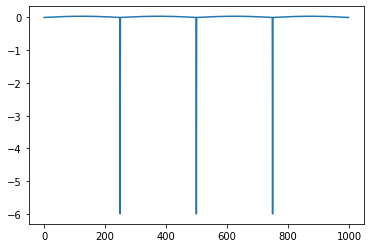

In [102]:
# del_train_x_inc=np.diff(train_x_inc)
# #del_train_x_inc_2=np.append(del_train_x_inc,del_train_x_inc[-1])
# plt.plot(del_train_x_inc)
# # plt.plot(del_train_x_inc_2)
plt.show()

In [348]:
df_1 =pd.read_excel('/content/20khz.xlsx')
train_x = np.array(df_1['x'], dtype=np.float64)
train_y = np.array(df_1['y'], dtype=np.float64)

# train_x = np.array(df['x'], dtype=np.float64)
# train_y = np.array(df['y'], dtype=np.float64)
print(train_x.shape, train_y.shape)

(2001,) (2001,)


In [349]:
train_x_d2=np.gradient(train_x)

In [350]:
print(train_x.shape,train_x_d2.shape)


(2001,) (2001,)


In [351]:
train_x_d3=np.diff(train_x)


In [345]:
train_x_d3.shape

(2000,)

In [352]:
n_size=2000
train_x=train_x[:n_size]
train_x_d2=train_x[:n_size]
train_x_d3=train_x[:n_size]

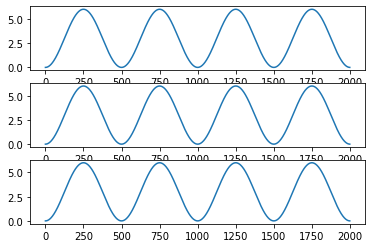

In [353]:
plt.subplot(3,1,1)
plt.plot(train_x)
plt.subplot(3,1,2)
plt.plot(train_x_d2)
plt.subplot(3,1,3)
plt.plot(train_x_d3)

plt.show()

In [337]:
train_x_d=train_x[:2000]
train_x_del=np.append(train_x, train_x_d)

In [338]:
print(train_x.shape,train_x_d.shape,train_x_del.shape)

(2001,) (2000,) (4001,)


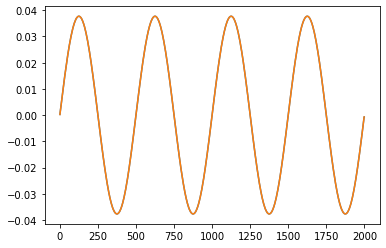

In [332]:
x_diff = np.diff(train_x)
x_diff_1 = np.append(x_diff, x_diff[-1])
plt.plot(x_diff_1)
plt.plot(x_diff)
plt.show()
# plt.plot(train_x_inc,del_train_x_inc)
# plt.show()

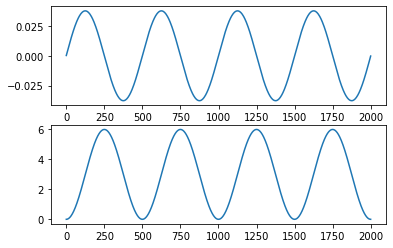

In [317]:
plt.subplot(2,1,1)
plt.plot(x_diff)
plt.subplot(2,1,2)
plt.plot(train_x)
plt.show()

In [330]:
train_x=train_x[:2000]

In [ ]:
d_train_x=train_x[0:]-train_x[1:]

In [324]:
print(d_train_x.shape,train_x.shape,x_diff.shape)

(2000,) (2001,) (2000,)


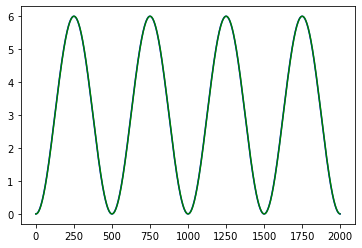

In [328]:
# plt.subplot(3,1,1)
# plt.plot(x_diff,'r')
# plt.subplot(3,1,2)
plt.plot(train_x,'b')
# plt.subplot(3,1,3)
plt.plot(d_train_x,'g')
plt.show()

In [307]:
train_x=train_x[:2000]
# d_train_x=d_train_x[:2000]


In [308]:
print(d_train_x.shape,train_x.shape)

(2000,) (2000,)


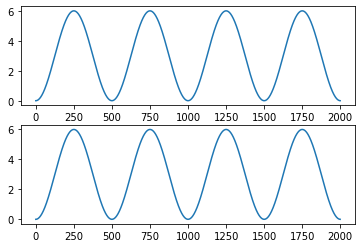

In [313]:
plt.subplot(2,1,1)
plt.plot(train_x)
plt.subplot(2,1,2)
#plt.plot(train_x)
plt.plot(d_train_x)
plt.show()

In [265]:
predict_y = predict(train_x_del, maximas_values, a_inc, b_inc, c_inc, d_inc)

In [276]:
print(train_x_del.shape,train_x.shape,predict_y.shape,train_y.shape)

(2001,) (900,) (2001,) (900,)


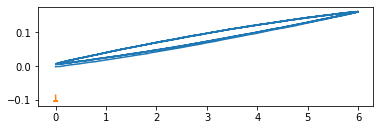

In [281]:
predict_y = predict(train_x_del, maximas_values, a_inc, b_inc, c_inc, d_inc)
predict_y = ewma_vectorized(predict_y, 11)
plt.subplot(2, 1, 1)
plt.plot(train_x_f, train_y_f)
plt.plot(train_x_del, predict_y)
plt.show()    
                                                  #Combine 
# y_pred_dec = predict(train_x_del, minimas_values, a_dec, b_dec, c_dec, d_dec)
# y_pred_dec = ewma_vectorized(y_pred_dec, 11)
# plt.subplot(2, 1, 2)
# plt.plot(train_x_del, train_y_dec,',')
# plt.plot(train_x_del, y_pred_dec,',')
# plt.show()

In [70]:
def cost_f_inc(x, y, maximas,  a, b, c, d):
    y_pred_inc = predict(x, maximas, a, b, c, d)
    return np.sum((y - y_pred_inc)**2)
                                              # combining cost # from where i want to combine inc and dec condition 
def cost_f_dec(x, y, minimas,  a, b, c, d):
    y_pred_d = predict_dec(x, minimas, a, b, c, d)
    return np.sum((y - y_pred_d)**2)   

In [71]:
cost_1 = cost_f_inc(train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
cost_1
cost_2 = cost_f_dec(train_x_dec, train_y_dec, minimas_values, a_inc, b_inc, c_inc, d_inc)
cost_2
print(cost_1)
print(cost_2)

0.012745436165296033
0.08945729344731065


In [72]:
def grad_a(x, y, maximas, a, b, c, d):
    y_pred = predict(x, maximas, a, b, c, d)
    cost_deriv = 2*(y - y_pred)
    a_deriv = np.zeros(x.shape)
    xp = maximas[0]
    maximas = maximas[1:]
    for i in range(x.shape[0]):
        a_deriv[i] = x[i] - xp
        if x[i] == xp:
            xp = maximas[0]
            maximas = maximas[1:]
    return np.sum(cost_deriv*a_deriv)


def grad_b(x, y, maximas, a, b, c, d):
    y_pred = predict(x, maximas, a, b, c, d)
    c_deriv = 2*(y - y_pred)
    b_deriv = np.zeros(x.shape)
    xp = maximas[0]
    maximas = maximas[1:]
    for i in range(x.shape[0]):
        b_deriv[i] = -np.exp(-d*(xp - x[i]))*(x[i] - xp)
        if x[i] == xp:
            xp = maximas[0]
            maximas = maximas[1:]
    return np.sum(c_deriv*b_deriv)


def grad_c(x, y, maximas, a, b, c, d):
    y_pred = predict(x, maximas, a, b, c, d)
    cost_deriv = 2*(y - y_pred)
    c_deriv = np.zeros(x.shape)
    xp = maximas[0]
    maximas = maximas[1:]
    f_xp = 1 - np.exp(-xp)
    for i in range(x.shape[0]):
        c_deriv[i] = f_xp
        if x[i] == xp:
            xp = maximas[0]
            maximas = maximas[1:]
            f_xp = 1 - np.exp(-xp)
    return np.sum(cost_deriv*c_deriv)


def grad_d(x, y, maximas, a, b, c, d):
    y_pred = predict(x, maximas, a, b, c, d)
    cost_deriv = 2*(y - y_pred)
    d_deriv = np.zeros(x.shape)
    xp = maximas[0]
    maximas = maximas[1:]
    for i in range(x.shape[0]):
        d_deriv[i] = b*np.exp(-d*(xp - x[i]))*(x[i] - xp)*(xp - x[i])
        if x[i] == xp:
            xp = maximas[0]
            maximas = maximas[1:]
    return np.sum(cost_deriv*d_deriv)

In [73]:
a_derv = grad_a(train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
b_derv = grad_b(train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
c_derv = grad_c(train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
d_derv = grad_d(train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)

a_derv, b_derv, c_derv, d_derv

(-12.988991596805327,
 11.130823999140935,
 5.016619529546028,
 1.5006594561718036)

In [74]:
a_derv = grad_a(train_x_dec, train_y_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)
b_derv = grad_b(train_x_dec, train_y_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)
c_derv = grad_c(train_x_dec, train_y_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)
d_derv = grad_d(train_x_dec, train_y_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)

a_derv, b_derv, c_derv, d_derv

(-12.215510358063877, 9.790330059409474, 0.0, -1.864272187165792)

In [75]:
def gradient_descent(x, y, maximas, a, b, c, d, alpha, iterations):
    costs = []
    for i in range(iterations):
        y_pred = predict(x, maximas, a, b, c, d)
        cost = cost_f_inc(x, y, maximas, a, b, c, d)
        costs.append(cost)
        if i % 100 == 0:
            print(f'Iteration {i}, cost: {cost}')
        a_grad = grad_a(x, y, maximas, a, b, c, d)
        b_grad = grad_b(x, y, maximas, a, b, c, d)
        c_grad = grad_c(x, y, maximas, a, b, c, d)
        d_grad = grad_d(x, y, maximas, a, b, c, d)
        a = a + alpha*a_grad
        b = b + alpha*b_grad
        c = c + alpha*c_grad
        d = d + alpha*d_grad
    return a, b, c, d, costs

In [77]:
a_inc, b_inc, c_inc, d_inc, costs = gradient_descent(
    train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc, 0.00001, 10000)
#combine
a_dec, b_dec, c_dec, d_dec, costs = gradient_descent(
    train_x_dec, train_y_dec, minimas_values, a_dec, b_dec, c_dec, d_dec, 0.00001, 10000)

Iteration 0, cost: 0.0055155673628458695
Iteration 100, cost: 0.005515269442914602
Iteration 200, cost: 0.005514986215843164
Iteration 300, cost: 0.00551471696091501
Iteration 400, cost: 0.005514460992038937
Iteration 500, cost: 0.005514217656139536
Iteration 600, cost: 0.005513986331618448
Iteration 700, cost: 0.00551376642688362
Iteration 800, cost: 0.0055135573789438196
Iteration 900, cost: 0.00551335865206578
Iteration 1000, cost: 0.005513169736491433
Iteration 1100, cost: 0.005512990147212753
Iteration 1200, cost: 0.005512819422801827
Iteration 1300, cost: 0.005512657124293864
Iteration 1400, cost: 0.005512502834120936
Iteration 1500, cost: 0.005512356155094273
Iteration 1600, cost: 0.005512216709433093
Iteration 1700, cost: 0.005512084137837976
Iteration 1800, cost: 0.005511958098606835
Iteration 1900, cost: 0.0055118382667916875
Iteration 2000, cost: 0.005511724333394452
Iteration 2100, cost: 0.005511616004600033
Iteration 2200, cost: 0.005511513001045101
Iteration 2300, cost: 0

In [ ]:
#cost_inc=0.005509472528623871
#cost_dec=0.011106558126266078

In [78]:
print(a_inc, b_inc, c_inc, d_inc) #-0.0007572041516086369 -0.034121191147066104 0.16168950463762052 0.038426038392100306
                                  #-0.005710084849514411 -0.04620117683031688 0.008 -0.0583260202148420

-0.0007572041516086369 -0.034121191147066104 0.16168950463762052 0.038426038392100306


In [79]:
print(a_dec, b_dec, c_dec, d_dec) #-0.005710084849514411 -0.04620117683031688 0.008 -0.0583260202148420

-0.005710084849514411 -0.04620117683031688 0.008 -0.05832602021484201


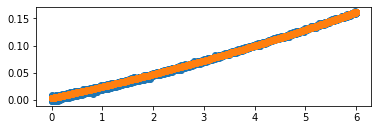

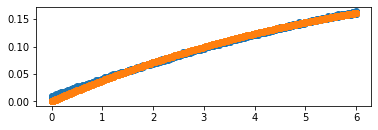

In [81]:
y_pred_inc = predict(train_x_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
#y_pred_inc = ewma_vectorized(y_pred_inc, 11)
plt.subplot(2, 1, 1)
plt.scatter(train_x_inc, train_y_inc)
plt.scatter(train_x_inc, y_pred_inc)
plt.show()
                                        #combine
y_pred_dec = predict(train_x_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)
#y_pred_dec = ewma_vectorized(y_pred_dec, 11)
plt.subplot(2, 1, 2)
plt.scatter(train_x_dec, train_y_dec)
plt.scatter(train_x_dec, y_pred_dec)
plt.show()

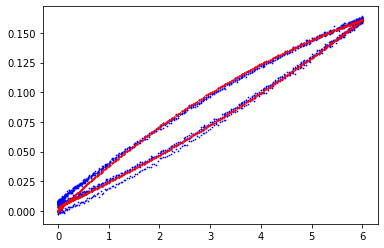

In [84]:
plt.scatter(train_x_inc, train_y_inc,c='b',s=0.5)
plt.scatter(train_x_inc, y_pred_inc,c='r',s=0.5)
plt.scatter(train_x_dec, train_y_dec,c='b',s=0.5)
plt.scatter(train_x_dec, y_pred_dec,c='r',s=0.5)
plt.show()

In [90]:
import sklearn

In [85]:
y_pred_inc= y_pred_inc.astype(np.float64)
y_pred_dec= y_pred_dec.astype(np.float64)

In [86]:
y_pred_inc.dtype
y_pred_dec.dtype
print(y_pred_inc.dtype,y_pred_dec.dtype)

float64 float64


In [88]:
train_y=train_y_inc+train_y_dec

In [87]:
y_pred=y_pred_inc+y_pred_dec

In [94]:
mse=sklearn.metrics.mean_squared_error(train_y, y_pred)
rmse=np.sqrt(mse)
print(rmse)

0.004104835003831068


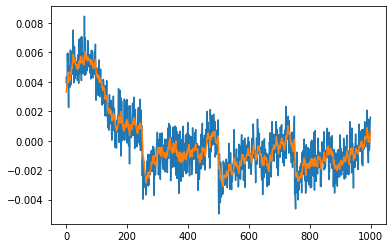

In [96]:
error=y_pred_inc-train_y_inc
error_smooth=ewma_vectorized(error,12)
plt.plot(error)
plt.plot(error_smooth)   
# plt.xlabel('Time (s)')
# plt.ylabel('Error signal')
plt.show()